In [5]:
import pandas as pd
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3
import seaborn as sns

In [3]:
data = pd.read_excel(r'D:\Python27\CampaignEffectivenessDemo.xlsx')

In [32]:
print(data)
# print(data.describe())

        CycleStartDateKey CycleStartDate  CycleStartYear CycleStartQuarter  \
0                20180904     2018-09-04            2018                Q3   
1                20190226     2019-02-26            2019                Q1   
2                20180713     2018-07-13            2018                Q3   
3                20170527     2017-05-27            2017                Q2   
4                20181005     2018-10-05            2018                Q4   
5                20170208     2017-02-08            2017                Q1   
6                20170423     2017-04-23            2017                Q2   
7                20170505     2017-05-05            2017                Q2   
8                20170801     2017-08-01            2017                Q3   
9                20180905     2018-09-05            2018                Q3   
10               20180314     2018-03-14            2018                Q1   
11               20170425     2017-04-25            2017        

<p> <h1> Percentage of Accounts Opened / Not Opened </h1></p>

In [231]:
print("Total number of Accounts", data.shape)
# print(data.describe())

print('*='*50)

data_iswon_1 = data[data['isWon']==1]
data_iswon_0 = data[data['isWon']==0]
print(data_iswon_1.shape)
print(data_iswon_0.shape)

print('*='*50)

print("Percentage of accounts opened successfully:", (data_iswon_1['isWon'].value_counts()/data['isWon'].shape[0])*100)
print("Percentage of accounts not opened successfully:", (data_iswon_0['isWon'].value_counts()/data['isWon'].shape[0])*100)

Total number of Accounts (106210, 46)
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
(13986, 46)
(92224, 46)
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
Percentage of accounts opened successfully: 1    13.168252
Name: isWon, dtype: float64
Percentage of accounts not opened successfully: 0    86.831748
Name: isWon, dtype: float64


In [225]:
print(data_iswon_1['isWon'].value_counts())
print(data['isWon'].shape[0])

1    13986
Name: isWon, dtype: int64
106210


<p> <b> Lead Source Group: "Opened Accounts" </B> <br> Number of customers who opened their accounts (Qualified Leads) through different <B>Source Groups </b>

Digital Leads              3664
Sales Lead                 3502
Inbound Call               1850
House Account              1385
Events                      951
Specialty                   847
Event                       828
Webinars                    379
Service to Sales            328
NONE                        190
New Marketing Campaigns      62
Name: LeadSourceGroup, dtype: int64


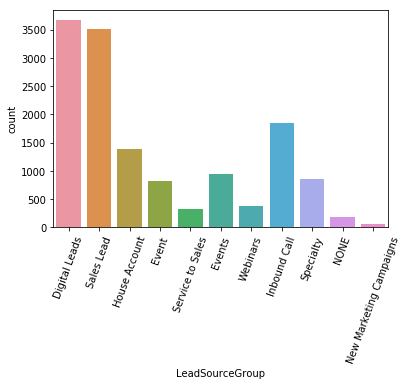

In [27]:
g1 = sns.countplot(data_iswon_1['LeadSourceGroup'])
for item in g1.get_xticklabels():
    item.set_rotation(70)
print(data_iswon_1.LeadSourceGroup.value_counts())

<p> <b> Lead Source Group: "Did not Opened their accounts"</B> <br>Number of customers who did not opened their accounts (Unqualified Leads)

Digital Leads              48929
Events                     12727
Specialty                  11751
Webinars                    5708
Inbound Call                4592
Sales Lead                  3820
New Marketing Campaigns     1822
House Account               1608
Service to Sales            1048
NONE                         219
Name: LeadSourceGroup, dtype: int64


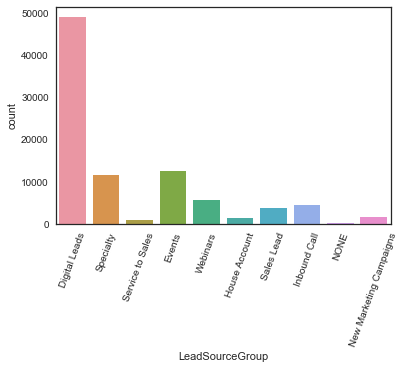

In [57]:
g2= sns.countplot(data_iswon_0['LeadSourceGroup'])
for item in g2.get_xticklabels():
    item.set_rotation(70)

print(data_iswon_0.LeadSourceGroup.value_counts())

In [232]:
# g2_1= sns.countplot(data_iswon_0[data_iswon_0.LeadSourceGroup=='Digital Leads'].LeadSourceType)
# for item in g2_1.get_xticklabels():
#     item.set_rotation(70)

In [233]:
# f = np.unique(data_iswon_0.LeadSourceGroup)
# for i in f:
#     print(i)

<p> <h1> Question 6 </H1></p><br>
<b> Objective: </b>How accurate are <b>lead grades</b> given to leads in determining likelihood of an account open? <br>

<h3> Solution </h3><br>
<p> Here objective is to determine how accurate the lead grades were assigned to the leads for opening an account..<br>
    1. I am using the column <b>"isWon"</b> to identify only the Opened Accounts<br>
    2. Calculating the percentage of Individual grades assigned to Leads, which will give us the insights of the correct percentages given to the leads for opening an account.</p>


In [216]:
# Total Count of individual Lead Grades For all customers.
print(data.shape)
print('*='*50)
# sns.countplot(data['LeadGrade'])
data.LeadGrade.value_counts()

(106210, 46)
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


B    55992
A    42321
C     7897
Name: LeadGrade, dtype: int64

<p>From the below pecentages I can draw a conclusion that, these were the accurate percentages of lead grades which were given to leads correctly for opening an account</p>

A    11777
C     1230
B      979
Name: LeadGrade, dtype: int64
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
   0 percentage
0  A     27.83%
1  B      1.75%
2  C     15.58%
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


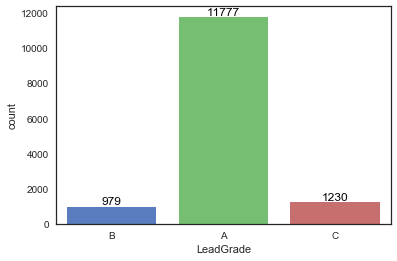

In [234]:
# Total Count of individual Lead Grades For all customers who WON / Opened an account.

print(data_iswon_1.LeadGrade.value_counts())
print('*='*50)
average  = (data_iswon_1['LeadGrade'].value_counts()/ data['LeadGrade'].value_counts())*100
T1  = pd.DataFrame(average.index)
percentage = pd.DataFrame(average.values)
T1['percentage'] = percentage

per = []
for i in T1['percentage']:
    value = "%.2f"%i+"%"
    per.append(value)
T1['percentage'] = per
print(T1)


#Plot
ax = sns.countplot(data_iswon_1['LeadGrade'])
print('*='*50)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')


<h1>Question 2:</h1><br>
<b>Objective: </b> Which campaigns have had the most success with generating qualified leads? <br>

<h3> Solution</h3>



In [239]:
print(data.shape)

(106210, 46)


In [238]:
data_qlead_1 = data[data['LeadsQualified']==1]
data_qlead_0 = data[data['LeadsQualified']==0]

print("Total number of LeadsQualified:", data_qlead_1.shape)
print("Total number of Leads UnQualified:", data_qlead_0.shape)

Total number of LeadsQualified: (35460, 46)
Total number of Leads UnQualified: (70750, 46)


Total Leads Qualified: 35460
********************
0    21474
1    13986
Name: isWon, dtype: int64
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


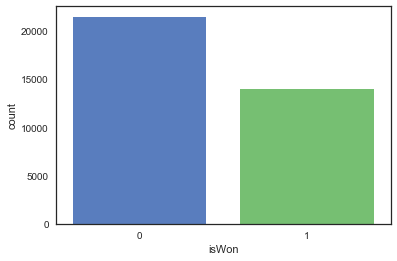

In [244]:
print("Total Leads Qualified:",data_qlead_1.shape[0])
print("*"*20)
print(data_qlead_1['isWon'].value_counts())
print("*="*50)
sns.countplot(data_qlead_1['isWon'])


In [246]:
data_qlead_1_iswon_1 = data_qlead_1[data_qlead_1['isWon']==1]
print(data_qlead_1_iswon_1.shape)

(13986, 46)


<p> <B>Percentage of "LEAD SOURCE GROUP"</B> </P> 

Success Percentage of every individual 'LEAD SOURCE GROUP' in generating qualified leads

                          0 Percentage
0             Digital Leads     37.98%
1                Sales Lead     14.24%
2              Inbound Call     11.92%
3                    Events      8.75%
4                 Specialty      8.29%
5             House Account      6.90%
6                  Webinars      6.25%
7                     Event      2.34%
8          Service to Sales      1.94%
9                      NONE      0.74%
10  New Marketing Campaigns      0.67%
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


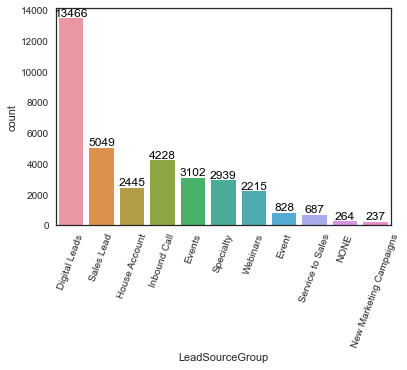

In [273]:
print("Success Percentage of every individual 'LEAD SOURCE GROUP' in generating qualified leads")
print("")
average_DQ = (data_qlead_1['LeadSourceGroup'].value_counts()/data_qlead_1.shape[0])*100
T2 = pd.DataFrame(average_DQ.index)
T2['Percentage'] = pd.DataFrame(average_DQ.values)

per_DQ = []
for j in T2['Percentage']:
    value_DQ = "%.2f"%j+"%"
    per_DQ.append(value_DQ)
T2['Percentage'] = per_DQ
print(T2)

print('*='*50)
DQ = sns.countplot(data_qlead_1.LeadSourceGroup)
for item in DQ.get_xticklabels():
    item.set_rotation(70)
for p in DQ.patches:
    DQ.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')    
    

Success Percentage of every individual 'LEAD SOURCE TYPE' in generating qualified leads

                                     0 Percentage
0                              Website     22.81%
1                                  PPC     12.87%
2                             Referral     12.01%
3                         Inbound Call     11.91%
4                          ETC Webinar      6.08%
5                        House Account      5.59%
6                 Special Time of Year      4.61%
7                    Educator Meetings      2.89%
8                    Client Cross Sell      2.34%
9                               NAREIA      2.34%
10                     NAREIA Meetings      1.97%
11                                 WBW      1.95%
12                    Service to Sales      1.94%
13                  Cross-Sell Account      1.41%
14              Incomplete Application      1.29%
15                        Social Media      0.94%
16                 Non NAREIA Meetings      0.94%
17         

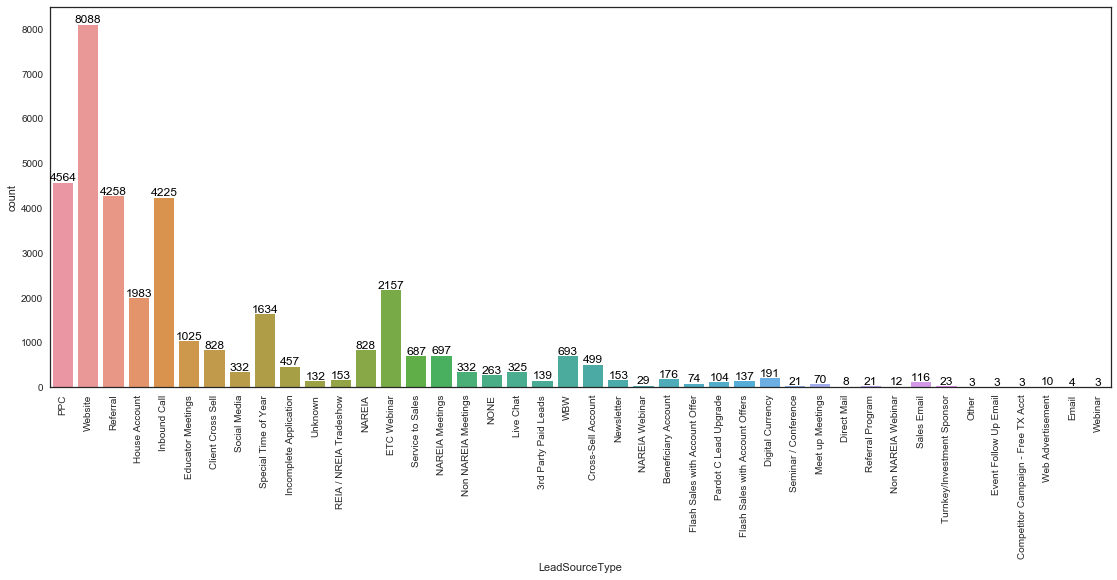

In [283]:
print("Success Percentage of every individual 'LEAD SOURCE TYPE' in generating qualified leads")
print("")
average_DQ = (data_qlead_1['LeadSourceType'].value_counts()/data_qlead_1.shape[0])*100
T2 = pd.DataFrame(average_DQ.index)
T2['Percentage'] = pd.DataFrame(average_DQ.values)

per_DQ = []
for j in T2['Percentage']:
    value_DQ = "%.2f"%j+"%"
    per_DQ.append(value_DQ)
T2['Percentage'] = per_DQ
print(T2)

print('*='*55)
dims = plt.figure(figsize = (19, 7))
DQ = sns.countplot(data_qlead_1.LeadSourceType)
for item in DQ.get_xticklabels():
    item.set_rotation(90)
for p in DQ.patches:
    DQ.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')    
    

<h1>Question 5:</h1><br>
<b>Objective: </b> What is the avg length of a sales cycle and is there a correlation between cycle length and likelihood of an account win (among cycles lasting > 1 week)? <br>

<h3> Solution</h3>



In [429]:
q5 = data
print(q5.shape)

print('*='*50)
q5 = q5[['LeadParentID','CycleSequence','CycleStartYearWeek','CycleStartDate','CycleEndDate','isWon']]
print(q5.head())

(106210, 46)
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
         LeadParentID  CycleSequence CycleStartYearWeek CycleStartDate  \
0  0068000000URIX5AAP              1           2018-W36     2018-09-04   
1  0068000000URIX5AAP              2           2019-W09     2019-02-26   
2  00Q0h00001g0F40EAE              1           2018-W28     2018-07-13   
3  0061A000015j7kiQAA              1           2017-W21     2017-05-27   
4  0061A000015j7kiQAA              1           2018-W40     2018-10-05   

                  CycleEndDate  isWon  
0  2018-09-14 09:29:32.0000000      0  
1  2019-03-11 09:15:26.0000000      0  
2  2018-07-13 14:25:42.0000000      0  
3  2017-08-07 00:00:00.0000000      1  
4  2018-10-12 11:51:18.0000000      0  


In [430]:
from datetime import datetime
q5['CycleStartDate'] = pd.to_datetime(q5['CycleStartDate'])
q5['CycleEndDate'] = pd.to_datetime(q5['CycleEndDate'])
print(q5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106210 entries, 0 to 106209
Data columns (total 6 columns):
LeadParentID          106210 non-null object
CycleSequence         106210 non-null int64
CycleStartYearWeek    106210 non-null object
CycleStartDate        106210 non-null datetime64[ns]
CycleEndDate          106210 non-null datetime64[ns]
isWon                 106210 non-null int64
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 4.9+ MB
None


In [431]:
from datetime import date
Start_Date = q5['CycleStartDate']
End_Date = q5['CycleEndDate']

date = Start_Date - End_Date
q5['date_diff'] = abs(date.dt.days)
print(q5.shape)
print('*='*50)
print(q5.head())

(106210, 7)
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
         LeadParentID  CycleSequence CycleStartYearWeek CycleStartDate  \
0  0068000000URIX5AAP              1           2018-W36     2018-09-04   
1  0068000000URIX5AAP              2           2019-W09     2019-02-26   
2  00Q0h00001g0F40EAE              1           2018-W28     2018-07-13   
3  0061A000015j7kiQAA              1           2017-W21     2017-05-27   
4  0061A000015j7kiQAA              1           2018-W40     2018-10-05   

         CycleEndDate  isWon  date_diff  
0 2018-09-14 09:29:32      0         11  
1 2019-03-11 09:15:26      0         14  
2 2018-07-13 14:25:42      0          1  
3 2017-08-07 00:00:00      1         72  
4 2018-10-12 11:51:18      0          8  


In [432]:
def variable(row):
    x = row['date_diff']
    if x>7:
        return 1
    return 0
q5['cycles_lasting> 1 week'] = q5.apply(variable, axis=1)

In [433]:
q5_date_diff_G7 = q5[q5['cycles_lasting> 1 week']==1]
print(q5_date_diff_G7.shape)

q5_date_diff_G = q5[q5['cycles_lasting> 1 week']==0]
print(q5_date_diff_G.shape)

(69971, 8)
(36239, 8)


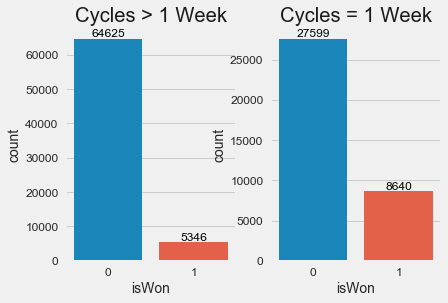

In [434]:
plt.subplot(121)
plt.title("Cycles > 1 Week")
DD1 = sns.countplot(q5_date_diff_G7['isWon'])
for p in DD1.patches:
    DD1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.subplot(122)
plt.title("Cycles = 1 Week")
DD2 = sns.countplot(q5_date_diff_G['isWon'])
for p in DD2.patches:
    DD2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [435]:
# def iswon(row):
#     x = row['isWon']
#     if x==0:
#         return "zero"
#     return "one"
# q5_date_diff_G7['isWon_Cat'] = q5_date_diff_G7.apply(iswon, axis=1)

In [436]:
# def cycle_lasting(row):
#     x = row['cycles_lasting> 1 week']
#     if x==0:
#         return "zero"
#     return "one"
# q5_date_diff_G7['cycles_lasting> 1 week_Cat'] = q5_date_diff_G7.apply(cycle_lasting, axis=1)

In [437]:
# q5_date_diff_G7['isWon_Cat'] = q5_date_diff_G7['isWon_Cat'].astype('category').cat.codes
# q5_date_diff_G7['cycles_lasting> 1 week_Cat'] = q5_date_diff_G7['cycles_lasting> 1 week_Cat'].astype('category').cat.codes

In [438]:
corr_data = q5_date_diff_G7[['LeadParentID','isWon','date_diff']]

<p> correlation between cycle length and likelihood of an account win (among cycles lasting > 1 week) is <b>"Negatively Correlated"</b> <br><br> which tells us there is no correlation between the features "Cycle length" and "isWon" <br>
    which mean it is not necessary that cycles lasting >1 week will have high success rate in winning an account.

In [439]:
import seaborn as sns
corr_df = corr_data.corr(method = 'pearson')
# mask = np.zeros_like(corr_df)

map = cmap=sns.diverging_palette(5, 240, as_cmap=True)
corr_df.style.background_gradient(cmap, axis=1).set_properties(**{'max-width': '80px', 'font-size': '10pt'}).set_precision(2)

,isWon,date_diff
isWon,1,-0.11
date_diff,-0.11,1


In [440]:
q5_date_diff_G7.corr(method ='spearman') 

,CycleSequence,isWon,date_diff,cycles_lasting> 1 week
CycleSequence,1.000000,-0.116451,-0.063622,NaN
isWon,-0.116451,1.000000,-0.139088,NaN
date_diff,-0.063622,-0.139088,1.000000,NaN
cycles_lasting> 1 week,NaN,NaN,NaN,NaN


In [ ]:
l

<h1>Question 4:</h1><br>
<b>Objective: </b> What is the projected # of accounts that will open in Q3 of 2019? <br>

<h3> Solution</h3>



In [285]:
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [287]:
print(data.shape)

(106210, 46)


In [288]:
data['CycleStartYear'].min(), data['CycleStartYear'].max()

(2017, 2019)

In [2]:
!python --version

Python 3.6.4 :: Anaconda, Inc.


<p> <b>Objective</b><br>
    1. Data set of 20 Million rows filtered for 1M rows <br>
    2. Filtered for Day= <b>Friday</b>, Volume !=0, and Assessment = <b>Right Data & Missing Data</b><br>
    </p>

In [5]:
import os
import pandas
# import pyodbc 
import impala
from impala.dbapi import connect
from impala.util import as_pandas

# Specify HIVE_HMS_HOST as an environment variable in your project settings
HIVE_HMS_HOST = os.getenv('HIVE_HMS_HOST', '192.168.208.128')

# This connection string depends on your cluster setup and authentication mechanism
conn = connect(host=HIVE_HMS_HOST,
               port='10000',
               auth_mechanism='PLAIN',
               user='cloudera', password='cloudera', database='cdsdq' )
cursor = conn.cursor()
cursor.execute("select * from retailer_missing")
tables = as_pandas(cursor)


In [6]:
import sys
data = tables
sys.getsizeof(data)

26776617

In [7]:
data.columns = ['Index','Sale_date','weekday_name','product','assessment','month','weekno','store_number','volume','turnover','turnover_missing']

In [8]:
data = data[['Sale_date','weekday_name','product','assessment','month','weekno','store_number','volume','turnover','turnover_missing']]

In [9]:
first_set = data[data.assessment=='Right Data']
print(first_set.shape)

(58836, 10)


In [10]:
import warnings
warnings.filterwarnings("ignore")

first_set.volume = first_set.volume.astype(float)
first_set.turnover = first_set.turnover.astype(float)
first_set.turnover_missing = first_set.turnover_missing.astype(float)
first_set.weekno = first_set.weekno.astype(int)
first_set.month = first_set.month.astype(int)
first_set.store_number = first_set.store_number.astype(int)
first_set['Sale_date'] =  pd.to_datetime(first_set['Sale_date'])
first_set['product'] = pd.DataFrame(first_set['product'])

# data['Day'] = pd.to_datetime(data['a sales_date'])
# data['weekday_name'] = data['a sales_date'].dt.weekday_name
# data['weekday'] =data['a sales_date'].dt.weekday
# data['weekno'] =data['a sales_date'].dt.week

In [11]:
first_set.head()

,Sale_date,weekday_name,product,assessment,month,weekno,store_number,volume,turnover,turnover_missing
0,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,2732,2.0,48.10,48.10
1,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,2768,6.0,149.46,149.46
2,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,2839,3.0,72.15,72.15
3,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,2840,3.0,72.15,72.15
4,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,2947,4.0,96.20,96.20
5,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,2996,2.0,49.82,49.82
6,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,3023,1.0,24.91,NaN
7,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,3047,1.0,24.91,24.91
8,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,3143,1.0,24.91,24.91
9,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,3167,2.0,49.82,49.82


In [12]:
len(np.unique(first_set['product']))

575

In [13]:
first_set.describe()

,month,weekno,store_number,volume,turnover,turnover_missing
count,58836.0,58836.000000,58836.000000,58836.000000,58836.000000,58816.000000
mean,4.0,15.776837,2926.835016,4.238205,121.309352,121.320219
std,0.0,1.461136,1239.128888,11.273705,216.870703,216.904153
min,4.0,14.000000,58.000000,-2.000000,-187.940000,-187.940000
25%,4.0,15.000000,1892.000000,1.000000,34.400000,34.400000
50%,4.0,16.000000,3016.000000,2.000000,63.800000,63.800000
75%,4.0,17.000000,3807.000000,4.000000,124.140000,124.140000
max,4.0,18.000000,5855.000000,553.000000,8570.640000,8570.640000


In [14]:
import warnings
warnings.filterwarnings('ignore')
import math
def variable(row):
    x = row['volume']
    y = row['turnover_missing']
#     print(x,y, type(x), type(y), math.isnan(y))
    if ((x==0) & (y==0)):
        return 'Right Data'
    if ((x>0) & (y>0)):
        return 'Right Data'
    if ((x<0) & (y<0)):
        return 'Right Data'
    if ((x!=0) & (math.isnan(y))):
        return 'Missing Data'
    if ((x==0) & (math.isnan(y))):
        return 'Missing Data'
    if ((math.isnan(x)) & (y!=0)):
        return 'Missing Data'
    return 'Invalid Data'
    
first_set['Assessment'] = first_set.apply(variable, axis=1)

In [15]:
sample_V = first_set[first_set['volume']!=0]
sample2_V = sample_V[sample_V['volume'].notnull()]
print('Null Values in Volume:', sample2_V.volume.isnull().sum())
# print('------')
# print('Count after removing zeros in Volume:',sample_T.shape)
# print('Count after removing empty values in Volume:', sample2_T.shape)

('Null Values in Volume:', 0)


In [16]:
# Shape of the total data set and Dataset after removing zeros from Volume.
print(first_set.shape)
print(sample2_V.shape)

(58836, 11)
(58836, 11)


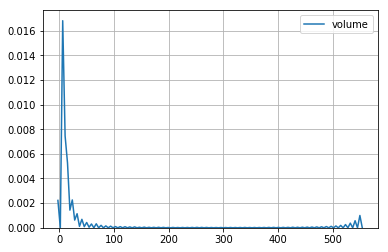

In [17]:
# sns.FacetGrid(sample2_V, size=4).map(sns.distplot, 'volume')
plt.grid()
# print ('Skewness is', sample2_T.skew())
sns.kdeplot(sample2_V.volume)

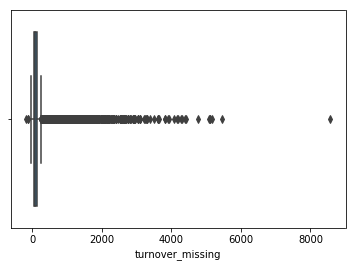

In [18]:
sns.boxplot(sample2_V.turnover_missing)

In [19]:
def outliers_z_score(sample2_V):
    threshold = 3

    mean_y = np.mean(sample2_V.volume)
    stdev_y = np.std(sample2_V.volume)
    z_scores = [(y - mean_y) / stdev_y for y in sample2_V.volume]
    return np.where(np.abs(z_scores) > threshold)

In [20]:
test = outliers_z_score(sample2_V)


In [21]:
# test

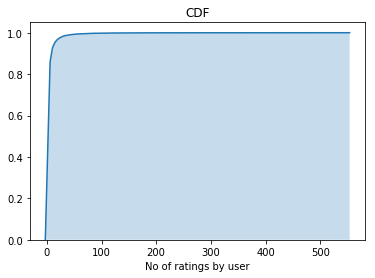

8.0
14.0
21.0
23.0
27.0
40.0
42.0
64.0
70.0
83.0
101.0
139.16500000000815
553.0
-------
Number of Outliers which are > 1755: 52


In [22]:
Volume_data = sample2_V['volume'].values

sns.kdeplot(Volume_data, shade=True, cumulative=True)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()
# print(Volume_data)
# counts, g = np.histogram(sample2_V['volume'])
# pdf = counts/(sum(counts))

# h=Volume_data/sum(Volume_data)
# cdf = np.cumsum(h)
# plt.plot(cdf)
# np.histogram(cdf)
# plt.plot(g[1:], pdf)
# plt.plot(g[1:],cdf)
# plt.grid()

print(np.percentile(Volume_data, 90))
print(np.percentile(Volume_data, 95))
print(np.percentile(Volume_data, 97))
print(np.percentile(Volume_data, 97.5))
print(np.percentile(Volume_data, 98.0))
print(np.percentile(Volume_data, 98.9))
print(np.percentile(Volume_data, 99.0))
print(np.percentile(Volume_data, 99.5))
print(np.percentile(Volume_data, 99.6))
print(np.percentile(Volume_data, 99.7))
print(np.percentile(Volume_data, 99.8))
print(np.percentile(Volume_data, 99.9))
print(np.percentile(Volume_data, 100))

print('-------')

print('Number of Outliers which are > 1755: %0r'%len(Volume_data[np.where( Volume_data > 148)]))


In [23]:
print('row count Before removing outliers from "Volume": %0r' %first_set.volume.shape)
Removing_outliers = first_set[first_set['volume']< 1755]
print('row count After removing outliers from "Volume": %0r' %Removing_outliers.volume.shape)

row count Before removing outliers from "Volume": 58836L
row count After removing outliers from "Volume": 58836L


In [24]:
sample2_V = sample2_V[sample2_V['volume']<1755]

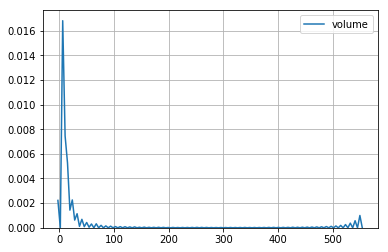

In [25]:
# sns.FacetGrid(sample2_V, size=4).map(sns.distplot, 'volume')
plt.grid()
sns.kdeplot(sample2_V.volume)

In [26]:
first_set.shape

(58836, 11)

In [27]:
second_set = first_set[first_set['volume']<1755]
second_set.shape

(58836, 11)

In [28]:
second_set.describe()

,month,weekno,store_number,volume,turnover,turnover_missing
count,58836.0,58836.000000,58836.000000,58836.000000,58836.000000,58816.000000
mean,4.0,15.776837,2926.835016,4.238205,121.309352,121.320219
std,0.0,1.461136,1239.128888,11.273705,216.870703,216.904153
min,4.0,14.000000,58.000000,-2.000000,-187.940000,-187.940000
25%,4.0,15.000000,1892.000000,1.000000,34.400000,34.400000
50%,4.0,16.000000,3016.000000,2.000000,63.800000,63.800000
75%,4.0,17.000000,3807.000000,4.000000,124.140000,124.140000
max,4.0,18.000000,5855.000000,553.000000,8570.640000,8570.640000


In [29]:
from pynverse import inversefunc
cube = (lambda n: n**3)
invcube = inversefunc(cube, second_set['turnover_missing'])
second_set['Inv_Cubic'] = invcube

In [30]:
print(first_set.turnover_missing.skew())
print(second_set['Inv_Cubic'].skew())

8.417318692610143
1.8753148541925788


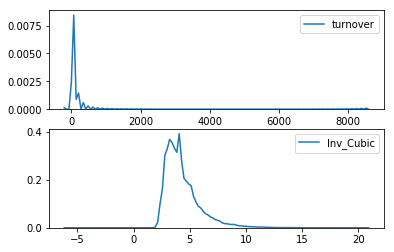

In [31]:
plt.subplot(211)
sns.kdeplot(second_set.turnover)

plt.subplot(212)
sns.kdeplot(second_set['Inv_Cubic'])

In [32]:
second_set.describe()

,month,weekno,store_number,volume,turnover,turnover_missing,Inv_Cubic
count,58836.0,58836.000000,58836.000000,58836.000000,58836.000000,58816.000000,58836.000000
mean,4.0,15.776837,2926.835016,4.238205,121.309352,121.320219,4.331135
std,0.0,1.461136,1239.128888,11.273705,216.870703,216.904153,1.583730
min,4.0,14.000000,58.000000,-2.000000,-187.940000,-187.940000,-5.728045
25%,4.0,15.000000,1892.000000,1.000000,34.400000,34.400000,3.252267
50%,4.0,16.000000,3016.000000,2.000000,63.800000,63.800000,3.995829
75%,4.0,17.000000,3807.000000,4.000000,124.140000,124.140000,4.988507
max,4.0,18.000000,5855.000000,553.000000,8570.640000,8570.640000,20.464655


In [33]:
second_set.head()
# print(min(sample2_V.turnover))

,Sale_date,weekday_name,product,assessment,month,weekno,store_number,volume,turnover,turnover_missing,Assessment,Inv_Cubic
0,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,2732,2.0,48.10,48.10,Right Data,3.636763
1,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,2768,6.0,149.46,149.46,Right Data,5.306909
2,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,2839,3.0,72.15,72.15,Right Data,4.163055
3,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,2840,3.0,72.15,72.15,Right Data,4.163055
4,2017-04-07,Friday,CREST B+S 2PACK 75ML,Right Data,4,14,2947,4.0,96.20,96.20,Right Data,4.582035


<p> Need to Correct the Product Names by removing the spaces <br>
    1. <b>From the below lines of code, don't remove anything.</b> </p>

In [34]:
second_set['product'].head(3)

0    CREST B+S 2PACK 75ML
1    CREST B+S 2PACK 75ML
2    CREST B+S 2PACK 75ML
Name: product, dtype: object

In [35]:
third_set = second_set['product'].str.replace(' ','_')

In [36]:
third_set['product'] = third_set

In [37]:
second_set['product'] = third_set['product']

In [38]:
second_set.columns

Index([u'Sale_date', u'weekday_name', u'product', u'assessment', u'month',
       u'weekno', u'store_number', u'volume', u'turnover', u'turnover_missing',
       u'Assessment', u'Inv_Cubic'],
      dtype='object')

In [39]:
second_set = second_set[['Sale_date','product','Assessment','weekno','store_number','volume','turnover','turnover_missing','Inv_Cubic']]

In [40]:
second_set.shape

(58836, 9)

In [41]:
# Outliers, Invalid Data was removed from this "Second_set" dataset.
# Printing the shapes of Second_set_positive, second_set_negative for reference

# second_set_right = second_set[second_set.Assessment=='Right Data']
# print(second_set_right.shape)

# Finding (Right Data) in Turnover column
second_set_Right = second_set[second_set['Assessment']=='Right Data']
print(second_set_Right.shape)

# # Finding (Missing Data) values in Turnover column 
second_set_Missing = second_set[second_set['Assessment']=='Missing Data']
print(second_set_Missing.shape)

(58816, 9)
(20, 9)


## Vectorizing the Product Name

In [42]:
fourth_set = second_set

In [43]:
fourth_set.columns

Index([u'Sale_date', u'product', u'Assessment', u'weekno', u'store_number',
       u'volume', u'turnover', u'turnover_missing', u'Inv_Cubic'],
      dtype='object')

In [44]:
fourth_set.shape

(58836, 9)

In [45]:
# Vectorizing on the "Products" of second_set (contains no outliers and Invalid data)

from sklearn.feature_extraction.text import CountVectorizer
OHE = CountVectorizer()
fourth_set1 = OHE.fit_transform(second_set['product'])
fourth_set2 = second_set['store_number'].values.reshape(-1,1)
fourth_set3 = second_set['weekno'].values.reshape(-1,1)
# fourth_set4 = second_set['Store'].reshape(-1,1)
fourth_set4 = second_set['volume'].values.reshape(-1,1)


In [46]:
# Applying One Hot Encoding on the "Products" of  Second_set.

from sklearn import preprocessing

# limit to categorical data using df.select_dtypes()
Onehot = second_set[['Sale_date','product','weekno','store_number','volume','turnover','turnover_missing','Inv_Cubic']]
# Onehot.columns
X = Onehot.select_dtypes(include=[object])
X.head(3)

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
X_2.head()
enc = preprocessing.OneHotEncoder()
enc.fit(X_2)
fourth_set1 = enc.transform(X_2)
fourth_set1.dtype

dtype('float64')

<p><b>Training Dataset</b></p>

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
Train_Products = fourth_set1[np.where(second_set['Assessment']=='Right Data')]
Train_store_number = fourth_set2[np.where(second_set['Assessment']=='Right Data')]
Train_weekno = fourth_set3[np.where(second_set['Assessment']=='Right Data')]
# Train_Store = fourth_set4[np.where(second_set['Assessment']=='Right Data')]
Train_Volume = fourth_set4[np.where(second_set['Assessment']=='Right Data')]


In [49]:
from scipy.sparse import hstack
Train_X = hstack((Train_Products, Train_store_number, Train_weekno, Train_Volume))
Train_Y = second_set_Right.Inv_Cubic


In [50]:
# Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [51]:
print(Train_X.shape)
print(Train_Y.shape)
# print('-----------')
# print(Test_X.shape)
# print(Test_Y.shape)

(58816, 578)
(58816L,)


<p><b> Test Dataset </b></p>

In [52]:
Test_Products = fourth_set1[np.where(second_set['Assessment']=='Missing Data')]
Test_weekday = fourth_set2[np.where(second_set['Assessment']=='Missing Data')]
Test_weekno = fourth_set3[np.where(second_set['Assessment']=='Missing Data')]
Test_Volume = fourth_set4[np.where(second_set['Assessment']=='Missing Data')]

In [53]:
from scipy.sparse import hstack
Test_X = hstack((Test_Products, Test_weekday, Test_weekno, Test_Volume))
Test_Y = second_set_Missing.turnover_missing


In [54]:
print(Test_X.shape)
print(Test_Y.shape)

(20, 578)
(20L,)


#### Grid Search for KNN

In [55]:
# sklearn.cross_validation has been changed to sklearn.model_selection
from sklearn.model_selection import *
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

# cv_scores = []
# neighbors = range(0,30,2)

# #Perform 10-fold cross validation on training set for odd values of k:
# for k in neighbors:
#     k_value = k+1
#     KNN = KNeighborsRegressor(n_neighbors = k_value, weights='distance', p=2, metric='euclidean')
#     kfold = KFold(n_splits=10, random_state=0)
#     scores = cross_val_score(KNN, Train_X, Train_Y)
    
# ###########   Finding Mean and Standard Deviation
    
#     cv_scores.append(scores.mean()*100)
#     print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

# # ############    MAPE
    
#     #     print(np.mean(np.abs((y_cv - pred) / y_cv)) * 10)
    
# # ###########     MSE
    
# # #     mse = mean_squared_error(y_cv, pred)
# # #     RMSE=sqrt(mse)
# # #     print("RMSE: %.2f" % RMSE)

# # ###########     R2 Score

# # #     r2 = r2_score(y_cv, pred)
# # #     print("r2: %.2f" % r2)

# # ##########      MAE    
    
# #     mae = mean_absolute_error(y_cv, pred)
# #     print('MAE: %f' % mae)

<p><b>KNN - Cross Validation</b></p>

In [56]:
from sklearn import ensemble
from sklearn import (metrics, model_selection, linear_model, preprocessing)
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from xgboost.sklearn import XGBRegressor
import datetime
# from sklearn import (metrics, cross_validation, linear_model, preprocessing)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# start_time  = datetime.datetime.now()


# kf = 5

# for i in range(kf):
#     X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(Train_X, Train_Y, test_size = 0.3)

#     KNN = KNeighborsRegressor(n_neighbors = 5, weights='distance', p=2, metric='euclidean')
#     KNN.fit(X_tr, y_tr)

#     pred = KNN.predict(X_cv)
    

# ###########   Finding Mean and Standard Deviation
    
# #     cv_scores.append(scores.mean()*100)
# #     print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

# ############    MAPE
    
#     #     print(np.mean(np.abs((y_cv - pred) / y_cv)) * 100)
    
# ###########     RMSE
    
#     mse = mean_squared_error(y_cv, pred)
#     RMSE=sqrt(mse)
#     print("RMSE: %.2f" % RMSE)

# ###########     R2 Score

#     r2 = r2_score(y_cv, pred)
#     print("r2: %.2f" % r2)

# ##########      MAE    
    
#     mae = mean_absolute_error(y_cv, pred)
#     print('MAE: %f' % mae)
    
# end_time = datetime.datetime.now()
# print ('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))

<p><b>Grid Search for XGB</b></p>

In [57]:
# param_test6 = {
#  'n_estimators':[100, 200, 300, 400, 500, 600, 700, 1000, 1100, 1200,1300, 1400, 1500],
#  'learning_rate':[0.0001, 0.001, 0.01, 0.1]
# }
# gsearch6 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=100, max_depth=4,
#  min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test6, n_jobs=4,iid=False, cv=5)
# gsearch6.fit(Train_X,Train_Y)
# gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

Max_depth and min_child_weight

In [58]:
# param_test1 = {
#  'max_depth':[4,5,6],
#  'min_child_weight':[4,5,6]
# }
# gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.7, n_estimators=1000, max_depth=5,
#  min_child_weight=4, gamma=0.1, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1), 
#  param_grid = param_test1,n_jobs=4,iid=False, cv=5)
# gsearch1.fit(Train_X,Train_Y)
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [59]:
# param_test4 = {
#  'subsample':[i/10.0 for i in range(6,10)],
#  'colsample_bytree':[i/10.0 for i in range(6,10)]
# }
# gsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.7, n_estimators=1000, max_depth=4,
#  min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test4, n_jobs=4,iid=False, cv=5)
# gsearch4.fit(Train_X ,Train_Y)
# gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

Gamma

In [60]:
# param_test3 = {
#  'gamma':[i/10.0 for i in range(0,5)]
# }
# gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.7, n_estimators=1000, max_depth=4,
#  min_child_weight=4, gamma=0, subsample=0.9, colsample_bytree=0.8, nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test3,n_jobs=4,iid=False, cv=5)
# gsearch3.fit(Train_X,Train_Y)
# gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [61]:
# param_test6 = {
#  'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
# }
# gsearch6 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.7, n_estimators=1000, max_depth=4,
#  min_child_weight=4, gamma=0.0, subsample=0.9, colsample_bytree=0.8, nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test6, n_jobs=4,iid=False, cv=5)
# gsearch6.fit(Train_X,Train_Y)
# gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

OLD CODE FOR GRID SERCH THE ESTIMATES AND LEARNING RATES

In [62]:
# model = XGBRegressor()
# n_estimators = [100, 200, 300, 400, 500]
# learning_rate = [0.0001, 0.001, 0.01, 0.1]
# kf= 5
# for i in range(kf):
#     param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators )
# # kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
#     grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
#     grid_result = grid_search.fit(Train_X, Train_Y)

In [63]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# metrics = grid_result.cv_results_['eval']
# for mean, stdev, param, eval in zip(means, stds, params, eval):
#     print("%f (%f) with: %r" % (mean, stdev, param, eval))

In [64]:
# from matplotlib import pyplot
# n_estimators = [100, 200, 300, 400, 500]
# loss = [0.025828, 0.121318 , 0.197507 , 0.257324, 0.308393]
# pyplot.plot(n_estimators, loss)
# pyplot.xlabel('n_estimators')
# pyplot.ylabel('Log Loss')
# pyplot.title('XGBoost learning_rate=0.1 n_estimators vs Log Loss')
# pyplot.show()

XGB Regressor

In [65]:
# from sklearn import ensemble

# start_time  = datetime.datetime.now()


# # params = {'n_estimators': 10000, 'max_depth': 10, 'min_samples_split': 5,
# #           'learning_rate': 0.01, 'loss': 'ls'}
# # clf = XGBRegressor(**params)
# start_time  = datetime.datetime.now()
# kf = 10
# params = {'learning_rate' : 0.1,'n_estimators' : 100,'max_depth' : 6,'min_child_weight' : 4,'gamma' : 0.0,'reg_lambda' : 10,'booster' : 'gbtree' ,'subsample' : 0.6,'reg_alpha' : 0,'colsample_bytree' : 0.8,'n_jobs' : -1,'silent' : True,'scale_pos_weight' : 1}
# for i in range(kf):
#     X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(Train_X, Train_Y, test_size = 0.2)

#     clf = XGBRegressor(**params)
#     clf.fit(X_tr, y_tr)

#     pred = clf.predict(X_cv)
    

# ###########   Finding Mean and Standard Deviation
    
# #     cv_scores.append(scores.mean()*100)
# #     print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

# ############    MAPE
    
#     print('MAPE',np.mean(np.abs((y_cv - pred) / y_cv)) * 10)
    
# ###########     MSE
    
#     mse = mean_squared_error(y_cv, pred)
#     RMSE=sqrt(mse)
#     print("RMSE: %.2f" % RMSE)

# ###########     R2 Score

#     r2 = r2_score(y_cv, pred)
#     print("r2: %.2f" % r2)

# ##########      MAE    
    
# #     mae = mean_absolute_error(y_cv, pred)
# #     print('MAE: %f' % mae)

# end_time = datetime.datetime.now()
# print ('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))

XGBRegressor to Test the data

In [66]:
from sklearn import ensemble
import datetime

start_time  = datetime.datetime.now()


# params = {'n_estimators': 10000, 'max_depth': 10, 'min_samples_split': 5,
#           'learning_rate': 0.01, 'loss': 'ls'}
# clf = XGBRegressor(**params)
start_time  = datetime.datetime.now()

# params = {'learning_rate' : 0.7,'n_estimators' : 1000,'max_depth' : 4,'min_child_weight' : 4,'gamma' : 0,'reg_lambda' : 0,'booster' : 'gbtree' ,'subsample' : 0.9,'reg_alpha' : 0.01,'colsample_bytree' : 0.8,'n_jobs' : -1,'silent' : True,'scale_pos_weight' : 1}
params = {'learning_rate' : 0.7,'n_estimators' : 1000,'max_depth' : 5,'min_child_weight' : 4,'gamma' : 0.3,'reg_lambda' : 0,'booster' : 'gbtree' ,'subsample' : 0.9,'reg_alpha' : 0.001,'colsample_bytree' : 0.9,'n_jobs' : -1,'silent' : True,'scale_pos_weight' : 1}


clf = XGBRegressor(**params)
clf.fit(Train_X, Train_Y)

pred_XGB = clf.predict(Test_X)


###########   Finding Mean and Standard Deviation

#     cv_scores.append(scores.mean()*100)
#     print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

############    MAPE

# print('MAPE',np.mean(np.abs((Test_Y - pred_XGB) / Test_Y)) * 10)

###########     MSE

# mse = mean_squared_error(Test_Y, pred_XGB)
# RMSE=sqrt(mse)
# print("RMSE: %.2f" % RMSE)

# ###########     R2 Score

# r2 = r2_score(Test_Y, pred_XGB)
# print("r2: %.2f" % r2)

# # ##########      MAE    

# mae = mean_absolute_error(Test_Y, pred_XGB)
# print('MAE: %f' % mae)

end_time = datetime.datetime.now()
print ('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))

Training Done..., Time Cost: 17


In [67]:
grid_1 = { 
                 "n_estimators"      : [100],
#                "criterion"         : ["gini", "entropy"],
               "max_features"      : [0.2,0.5,0.8],
               "max_depth"         : [3,4,6,10],
               "min_samples_split" : [2, 5, 20,50],
#                 "random_state"     : range(1,42)
         }



RF=RandomForestRegressor()
grid_search = GridSearchCV(RF, grid_1, n_jobs=-1, cv=5)
grid_search.fit(Train_X, Train_Y)





NameError: name 'RandomForestRegressor' is not defined

In [68]:
grid_search.grid_scores_

NameError: name 'grid_search' is not defined

In [69]:
grid_search.best_score_

NameError: name 'grid_search' is not defined

In [70]:
#This code is to impute the incorrect values of Turnover.

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

start_time  = datetime.datetime.now()
# clf = Lasso()
RF = RandomForestRegressor(n_estimators=1000, min_samples_split=5, max_features=0.8, max_depth=10, random_state=0)

KNN = KNeighborsRegressor(n_neighbors=15, weights='distance', metric = 'euclidean')

KNN.fit(Train_X, Train_Y)
RF.fit(Train_X, Train_Y)

pred_KNN = KNN.predict(Test_X)
pred_RF = RF.predict(Test_X)

actual = Test_Y

############    MAPE

# print('MAPE_KNN',np.mean(np.abs((actual - pred_KNN) / actual)) * 100)
##############################################
# r2_RF = r2_score(actual, pred_RF)
# print("r2_RF: %.2f" % r2_RF)

# mae_RF = mean_absolute_error(actual, pred_RF)
# print('MAE_RF: %f' % mae_RF)

#########################################

# r2_KNN = r2_score(actual, pred_KNN)
# print("r2_KNN: %.2f" % r2_KNN)

# mae_KNN = mean_absolute_error(actual, pred_KNN)
# print('MAE_KNN: %f' % mae_KNN)


end_time = datetime.datetime.now()
print ('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))

Training Done..., Time Cost: 117


In [71]:
np.mean(Test_Y)

nan

In [72]:
# def mape(y_cv, pred):
#     return np.mean(np.abs((y_cv - pred) / y_cv)) * 100
# print(mape(y_cv, pred))

In [73]:

# MSE1 = mean_squared_error(Test_Y, pred)
# rmse1=sqrt(MSE1)
# print(rmse1)

# rsqerror3=r2_score(Test_Y, pred)
# print (rsqerror3)

In [74]:
# T = Test_Y.reshape(-1,1)
# P_KNN = pred_KNN.reshape(-1,1)
# P_XGB = pred_XGB.reshape(-1,1)

In [75]:
import math
T1 = pd.DataFrame(Test_Y)
T1_KNN = pd.DataFrame(pred_KNN)
T1_XGB = pd.DataFrame(pred_XGB)
T1_RF = pd.DataFrame(pred_RF)

In [76]:
T1['KNN'] = pred_KNN
T1['XGB'] = pred_XGB
T1['RF'] = pred_RF

In [77]:
print(T1.shape)
T1[['KNN','XGB','RF']]

(20, 4)


,KNN,XGB,RF
6,3.613922,2.923041,3.312154
12,3.139164,2.915920,3.312154
13,4.411875,4.648457,4.847376
14,4.330484,3.688511,4.026897
15,4.578934,5.287376,5.335779
16,3.254415,2.915920,3.312154
17,5.048620,5.049445,5.255242
36,4.123974,4.652948,4.847376
56,3.243818,2.310264,3.312154
47329,3.449969,3.928104,3.312154


In [78]:
# def pow(row):
#     x = row['Inv_Cubic']
#     if x ==x:
#         return math.pow(x,3)
# T1['Inv_Cubic'] = T1.apply(pow, axis=1)

In [79]:
def pow2(row2):
    x = row2['KNN']
    if x == x:
        return math.pow(x,3)
T1['KNN'] = T1.apply(pow2, axis=1)    

In [80]:
def pow3(row3):
    x = row3['XGB']
    if x == x:
        return math.pow(x,3)
T1['XGB'] = T1.apply(pow3, axis=1) 

In [81]:
def pow4(row4):
    x = row4['RF']
    if x == x:
        return math.pow(x,3)
T1['RF'] = T1.apply(pow4, axis=1) 

In [82]:
# def Assessment(row4):
#     y = row4['Assessment']
#     if y == y:
#         return 'Missing Data'
#     T1['Assessment'] = T1.apply(Assessment, axis=1)

In [83]:
T1.describe()

,turnover_missing,KNN,XGB,RF
count,0.0,20.000000,20.000000,20.000000
mean,NaN,63.264844,91.029970,69.316326
std,NaN,28.386209,62.611320,39.082001
min,NaN,30.934437,12.330623,36.335543
25%,NaN,40.303707,46.792314,36.335543
50%,NaN,57.205142,80.566645,65.299771
75%,NaN,79.573272,119.896928,98.939106
max,NaN,128.682087,264.611479,151.912517


In [84]:
fourth_set.columns

Index([u'Sale_date', u'product', u'Assessment', u'weekno', u'store_number',
       u'volume', u'turnover', u'turnover_missing', u'Inv_Cubic'],
      dtype='object')

In [85]:
T1['Assessment'] = fourth_set[fourth_set[['Sale_date','product','Assessment','weekno','store_number','volume','turnover','turnover_missing']].Assessment == 'Missing Data'].Assessment

In [86]:
fourth_set.loc[fourth_set['Assessment']=='Missing Data','XGB'] = T1['XGB']
fourth_set.loc[fourth_set['Assessment']=='Missing Data','KNN'] = T1['KNN']
fourth_set.loc[fourth_set['Assessment']=='Missing Data','RF'] = T1['RF']

In [87]:
fourth_set.loc[fourth_set['XGB'].isnull(),'XGB'] = fourth_set['turnover']
fourth_set.loc[fourth_set['KNN'].isnull(),'KNN'] = fourth_set['turnover']
fourth_set.loc[fourth_set['RF'].isnull(),'RF'] = fourth_set['turnover']

In [88]:
fourth_set[fourth_set['Assessment']=='Missing Data'][['turnover','XGB','KNN','RF']]

,turnover,XGB,KNN,RF
6,24.91,24.974958,47.199395,36.335543
12,24.91,24.792883,30.934437,36.335543
13,99.64,100.444540,85.875568,113.899042
14,48.10,50.182606,81.209972,65.299771
15,149.46,147.815701,96.004829,151.912517
16,24.91,24.792883,34.468218,36.335543
17,124.55,128.745180,128.682087,145.136986
36,99.64,100.736000,70.137096,113.899042
56,11.68,12.330623,34.132593,36.335543
47329,60.34,60.610634,41.062516,36.335543


<p> Observations <br>
    1. For Turnover Mean is 4.23 and Median is 2, so need to check the BoxCox or log transform to make them gaussian. <br>
    2.  Tried with Cubic root Transformation</p>

In [89]:
fourth_set.head(2)

,Sale_date,product,Assessment,weekno,store_number,volume,turnover,turnover_missing,Inv_Cubic,XGB,KNN,RF
0,2017-04-07,CREST_B+S_2PACK_75ML,Right Data,14,2732,2.0,48.10,48.10,3.636763,48.10,48.10,48.10
1,2017-04-07,CREST_B+S_2PACK_75ML,Right Data,14,2768,6.0,149.46,149.46,5.306909,149.46,149.46,149.46


In [ ]:
fourth_set =fourth_set[['Sale_date','product','Assessment','weekno','store_number','volume','turnover','turnover_missing','XGB','KNN', 'RF']]

In [ ]:
fifth_set = fourth_set[fourth_set[['Sale_date','product','Assessment','weekno','store_number','volume','turnover','turnover_missing','XGB','KNN','RF']].Assessment=='Missing Data']

In [ ]:
fifth_set.shape

In [ ]:
fifth_set['Retailer'] = 'Boots_UK'

In [ ]:
fifth_set.head()

In [ ]:
fifth_set.to_csv(r'D:\CDSDQ-POC\Boots_UK\boots_UK.csv')

In [ ]:
print('MAPE_XGB',np.mean(np.abs((fifth_set.turnover - fifth_set.XGB) / fifth_set.turnover)) * 100)
##########     MSE

mse = mean_squared_error(fifth_set.turnover, fifth_set.XGB)
RMSE=sqrt(mse)
print("RMSE: %.2f" % RMSE)

###########     R2 Score

r2 = r2_score(fifth_set.turnover, fifth_set.XGB)
print("r2: %.2f" % r2)

# ##########      MAE    


mae = mean_absolute_error(fifth_set.turnover, fifth_set.XGB)
print('MAE: %f' % mae)

In [ ]:
MAPE = np.mean(np.abs((fifth_set.turnover - fifth_set.XGB) / fifth_set.turnover)) * 100
XGBaccuracy = 100-np.mean(MAPE)
print('Accuracy Avg of XGB: %.2f'%XGBaccuracy)

In [ ]:
MAPE = np.mean(np.abs((fifth_set.turnover - fifth_set.KNN) / fifth_set.turnover)) * 100
KNNaccuracy = 100-np.mean(MAPE)
print('Accuracy Avg of KNN: %.2f'%KNNaccuracy)

In [ ]:
MAPE = np.mean(np.abs((fifth_set.turnover - fifth_set.RF) / fifth_set.turnover)) * 100
RFaccuracy = 100-np.mean(MAPE)
print('Accuracy Avg of XGB: %.2f'%XGBaccuracy)
print('Accuracy Avg of KNN: %.2f'%KNNaccuracy)
print('Accuracy Avg of RF: %.2f'%RFaccuracy)

In [ ]:
fifth_set = fifth_set[['turnover','XGB','KNN','RF']]
fifth_set.head(2)

In [ ]:
fifth_set['XGB%']= np.abs(100-((np.abs((fifth_set.turnover - fifth_set.XGB) / fifth_set.turnover))*100))
fifth_set['KNN%']= np.abs(100-((np.abs((fifth_set.turnover - fifth_set.KNN) / fifth_set.turnover))*100))
fifth_set['RF%']= np.abs(100-((np.abs((fifth_set.turnover - fifth_set.RF) / fifth_set.turnover))*100))

In [ ]:
fifth_set

In [ ]:
# import os
# import pandas
# # import pyodbc 
# from impala.dbapi import connect
# from impala.util import as_pandas

# # Specify HIVE_HMS_HOST as an environment variable in your project settings
# HIVE_HMS_HOST = os.getenv('HIVE_HMS_HOST', '192.168.184.129')

# # This connection string depends on your cluster setup and authentication mechanism
# conn = connect(host=HIVE_HMS_HOST,
#                port='10000',
#                auth_mechanism='PLAIN',
#                user='cloudera', password='cloudera', database='cdsdq' )
# cursor = conn.cursor()
# cursor.execute('''CREATE EXTERNAL TABLE cdsdq.boots_retailer (
# index int, sale_date string, product string, Assessment string,
# weekno int, store_number string,
# volume DECIMAL(18,2), turnover DECIMAL(18,2), turnover_missing DECIMAL(18,2),XGB DECIMAL(18,2), KNN DECIMAL(18,2)
# )
# ROW FORMAT DELIMITED
# FIELDS TERMINATED BY ','
# STORED AS TEXTFILE
# LOCATION '/user/cloudera/CDSDQ'

# ''')
# cursor.close()
              
                                                              




In [ ]:
# fourth_set.to_csv('http://quickstart.cloudera:8888/hue/filebrowser/view%3D/user/cloudera/#/user/cloudera/CDSDQ/test.csv',sep='\t', index=False)

# load_statement = "hive -e \"LOAD DATA LOCAL INPATH '/home/user/cloudera/test.csv' OVERWRITE INTO TABLE boots_retailer\""

# os.system(load_statement);